In [1]:
#Import libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm, dates
import plotly.express as px
from textblob import TextBlob
import seaborn as sns
import geopandas as gpd
from wordcloud import WordCloud, STOPWORDS
from datetime import datetime, timedelta
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Data Cleaning

In [4]:
#Preprocess Trump Dataset for analysis
df = pd.read_csv("dataset/hashtag_donaldtrump.csv", lineterminator='\n')
df_trump = df.drop(columns=['tweet_id', 'source', 'user_screen_name', 'user_description','state_code', 'collected_at', 'user_location', 'city'])

#Removing tweets with NaN values for user_location 
df_trump = df_trump.dropna(axis='rows', thresh=10)

In [5]:
df_trump.shape

(445719, 13)

In [3]:
#Preprocess Biden Dataset for analysis
df = pd.read_csv("dataset/hashtag_joebiden.csv", lineterminator='\n')
df_biden = df.drop(columns=['tweet_id', 'source', 'user_screen_name', 'user_description', 'state_code', 'collected_at', 'city', 'user_location'])

#Removing tweets with NaN values for user_location 
df_biden = df_biden.dropna(axis='rows', thresh=10)

In [6]:
#Creating a test dataframe (only 10000 tweets)
test_trump = df_trump.sample(100000)
#print(test_trump.head(4))
test_biden = df_biden.sample(100000)

In [282]:
# saving the DataFrame as a CSV file
trump_csv_data = test_trump.to_csv('test_trump.csv', index = True)

In [283]:
# saving the DataFrame as a CSV file
biden_csv_data = test_biden.to_csv('test_biden.csv', index = True)

# Sentiment Analysis

## Trump Tweets 

In [7]:
#USING TEST DATASET
tweets_trump = [TextBlob(desc) for desc in test_trump['tweet']]

#add the sentiment metrics to the dataframe
test_trump['polarity'] = [b.polarity for b in tweets_trump]
test_trump['subjectivity'] = [b.subjectivity for b in tweets_trump]

TextBlob returns polarity and subjectivity of a sentence. Polarity lies between [-1, 1], -1 defines a negative sentiment and 1 defines a positive sentiment. Negation words reverse the polarity. TextBlob has semantic labels that help with fine-grained analysis. For example — emoticons, exclamation mark, emojis, etc. Subjectivity lies between [0,1]. Subjectivity quantifies the amount of personal opinion and factual information contained in the text. The higher subjectivity means that the text contains personal opinion rather than factual information. It should be noted that any sentiment score between 0.05 and -0.05 is considered "Neutral".

In [11]:
test_trump.loc[test_trump.polarity > 0,'sentiment'] = 'positive'
test_trump.loc[test_trump.polarity == 0,'sentiment'] = 'neutral'
test_trump.loc[test_trump.polarity < 0,'sentiment'] = 'negative'
test_trump

created_at  \
561130  2020-11-04 06:12:57   
589240  2020-11-04 10:07:37   
855218  2020-11-07 17:11:41   
698935  2020-11-05 17:18:14   
762197  2020-11-06 10:22:58   
...                     ...   
118434  2020-10-21 01:55:54   
931404  2020-11-08 02:39:10   
557009  2020-11-04 05:43:33   
9017    2020-10-15 13:30:00   
414294  2020-11-02 00:55:47   

                                                    tweet  likes  \
561130  What going on? I have already said that the Je...    2.0   
589240  🟥 Biden's Wisconsin lead is already growing. \...    0.0   
855218  Hope #Biden follows the right path &amp; not t...    0.0   
698935  #Biden demande à compter toutes les voix 😂😂 tu...    0.0   
762197  Alasan Warga Asia Dukung Donald Trump, Joe Bid...    0.0   
...                                                   ...    ...   
118434  #Trump's dumbass male chauvinist lies like thi...    4.0   
931404  @Frankvdb1971 The win for #bidenharis2020 give...    3.0   
557009  ABD yakın tarihinin en kritik seçimi için sand...    3.0   
9017    #JoeBiden has vowed that his administration wo...    3.0   
414294  #WTF did I just watch #NFL Suspend him for yea...    2.0   

        retweet_count       user_id  \
561130            0.0  1.152928e+18   
589240            0.0  1.278799e+18   
855218            0.0  2.678711e+08   
698935            0.0  7.607401e+17   
762197            0.0  1.306381e+18   
...               ...           ...   
118434            2.0  2.891864e+08   
931404            0.0  6.184923e+08   
557009            1.0  1.283964e+18   
9017              1.0  7.016095e+17   
414294            1.0  7.285748e+07   

                                        user_name       user_join_date  \
561130                                   Talha Ch  2019-07-21 13:05:40   
589240                           Dinno World News  2020-07-02 21:12:07   
855218                       Imran Khan عمران خان  2011-03-17 18:11:19   
698935                   🇫🇷🇨🇭🇨🇭Mike & Marjo🇨🇭🇨🇭🇫🇷  2016-08-03 07:32:23   
762197                              Cerdik Cuitan  2020-09-16 23:55:00   
...                                           ...                  ...   
118434  Andy Fox for a happy, safe, better world!  2011-04-28 05:23:45   
931404                            Allan McGinness  2012-06-25 22:21:11   
557009                                  newsapost  2020-07-17 03:18:33   
9017                                     Mobashra  2016-02-22 03:28:40   
414294                                     Andrew  2009-09-09 13:56:14   

        user_followers_count        lat        long                   country  \
561130                 776.0  31.000000   72.000000                  Pakistan   
589240                 208.0  43.851977   18.386687    Bosnia and Herzegovina   
855218                 270.0  19.075990   72.877393                     India   
698935                1035.0  46.798562    8.231974               Switzerland   
762197                  13.0  -2.483383  117.890285                 Indonesia   
...                      ...        ...         ...                       ...   
118434                4949.0  39.783730 -100.445882             United States   
931404                 713.0  56.786111   -4.114052            United Kingdom   
557009                  31.0  41.009633   28.965165                    Turkey   
9017                  5189.0  38.894992  -77.036558  United States of America   
414294                 237.0  40.712728  -74.006015  United States of America   

            continent                                 state  polarity  \
561130           Asia                                Punjab  0.100000   
589240         Europe  Federation of Bosnia and Herzegovina  0.000000   
855218           Asia                           Maharashtra  0.285714   
698935         Europe                                   NaN  0.000000   
762197           Asia                                   NaN  0.000000   
...               ...                                   ..

## Biden Tweets

In [12]:
test_biden['tweet'] = df_biden['tweet'].astype(str)
tweets_biden = [TextBlob(desc) for desc in test_biden['tweet']]

#add the sentiment metrics to the dataframe
test_biden['polarity'] = [b.polarity for b in tweets_biden]
test_biden['subjectivity'] = [b.subjectivity for b in tweets_biden]

In [16]:
test_biden.loc[test_biden.polarity > 0,'sentiment'] = 'positive'
test_biden.loc[test_biden.polarity == 0,'sentiment'] = 'neutral'
test_biden.loc[test_biden.polarity < 0,'sentiment'] = 'negative'
test_biden

created_at  \
770748  2020-11-08 18:15:32   
480066  2020-11-05 14:58:44   
701933  2020-11-08 00:18:04   
409401  2020-11-04 14:21:52   
142404  2020-10-23 12:46:30   
...                     ...   
217815  2020-10-28 15:18:42   
726266  2020-11-08 11:41:00   
718611  2020-11-08 06:00:50   
776760  2020-11-08 23:49:26   
481979  2020-11-05 15:50:32   

                                                    tweet  likes  \
770748  On #Leadership - #Biden Campaign Senior Advise...    0.0   
480066  All 👀 on GA, they know that this state is key ...    0.0   
701933  Yesterday evening I realized how useless Media...    0.0   
409401       MICHIGANNNNNN\n#Biden leading\n#Biden wining    0.0   
142404  Tony Bobulinski, just EXPOSED #JoeBiden aka #B...    0.0   
...                                                   ...    ...   
217815  #CannabisNews 🌱 | Democratic #cannabis #legali...    8.0   
726266  पंजाब के चित्रकार ने कुछ इस अंदाज में दी अमेरि...    2.0   
718611  Por mim o #Trump deve agir nas calmas, está mu...    0.0   
776760  @France24_es LOS MEDIOS A LA FUERZA QUIEREN HA...    0.0   
481979  @lutfimuhamad008 @realDonaldTrump Why #Joebide...    2.0   

        retweet_count       user_id           user_name       user_join_date  \
770748            0.0  1.955005e+09          CMA_Social  2013-10-11 20:17:16   
480066            0.0  1.252229e+18                TR76  2020-04-20 13:34:45   
701933            0.0  7.291956e+07      Uma Kant Singh  2009-09-09 18:45:38   
409401            0.0  1.051408e+18    José Carlos Melo  2018-10-14 09:42:30   
142404            0.0  1.168985e+18      Gregory Malone  2019-09-03 20:32:11   
...               ...           ...                 ...                  ...   
217815            6.0  8.322571e+17  Kannabia Seeds Int  2017-02-16 15:55:34   
726266            0.0  8.525535e+08            PTC NEWS  2012-09-29 09:27:40   
718611            0.0  1.597982e+09         José Maindo  2013-07-16 09:46:27   
776760            0.0  1.263451e+18                RAÚL  2020-05-21 12:45:04   
481979            1.0  5.805506e+08        Ashlee Jenna  2012-05-15 04:44:26   

        user_followers_count        lat        long                   country  \
770748                3593.0  34.053691 -118.242766  United States of America   
480066                 141.0  27.756767  -81.463983  United States of America   
701933                 555.0  28.613895   77.209006                     India   
409401                  11.0  23.013134  -80.832875                      Cuba   
142404                  55.0  33.617009 -117.929440  United States of America   
...                      ...        ...         ...                       ...   
217815                3979.0  37.183054   -3.602193                     Spain   
726266               14070.0  30.704705   76.717815                     India   
718611                  61.0 -11.877577   17.569124                    Angola   
776760                  61.0  -1.339767  -79.366697                   Ecuador   
481979                1465.0  43.156168  -75.844995  United States of America   

            continent       state           created_at_time created_at_ymd  \
770748  North America  California 2020-11-08 18:15:32+00:00     2020-11-08   
480066  North America     Florida 2020-11-05 14:58:44+00:00     2020-11-05   
701933           Asia       Delhi 2020-11-08 00:18:04+00:00     2020-11-08   
409401  North America         NaN 2020-11-04 14:21:52+00:00     2020-11-04   
142404  North America  California 2020-10-23 12:46:30+00:00     2020-10-23   
...               ...         ...                       ...            ...   
217815         Europe   Andalusia 2020-10-28 15:18:42+00:00     2020-10-28   
726266           Asia      Punjab 2020-11-08 11:41:00+00:00     2020-11-08   
718611         Africa         NaN 2020-11-08 06:00:50+00:00     2020-11-08   
776760  South America         NaN 2020-11-08 23:49:26+00:00     2020-11-08   
481979  North America    New York 2

## World Map

In [8]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
from shapely.geometry import Point, Polygon
crs = {'init': 'EPSG:4326'}

#print(loc_biden.head(5))
tmp=pd.concat([df_biden[['lat','long']].copy(), df_trump[['lat','long']].copy()])
tmp = tmp.dropna()
geometry = [Point(xy) for xy in zip(tmp['long'],tmp['lat'])]
geo_df = gpd.GeoDataFrame(tmp, crs=crs, geometry = geometry)

/usr/local/lib/python3.9/site-packages/pyproj/crs/crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


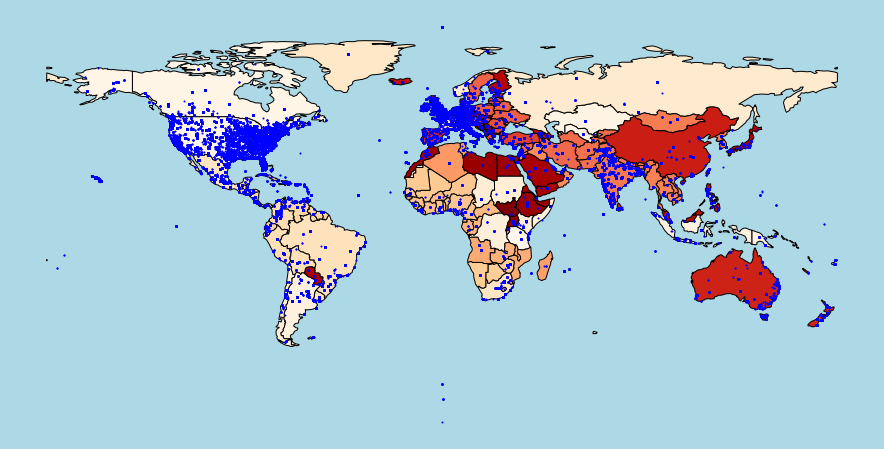

In [9]:
fig, ax = plt.subplots(1,figsize=(16,8), facecolor='lightblue')
world = world[world.name != "Antarctica"]
world.plot(ax=ax, cmap='OrRd', edgecolors='black')
geo_df.plot(ax=ax, markersize=1, color='b', marker='o')
ax.axis('off')
plt.show()

Plotting the available geo data in the dataset shows that many countries around the world are tweeting about the two presidential candidates, especially in European countries. 

We can also see points in the far East coast and Pacific region of the USA to be heavily congregated, while there is a sparse distribution in the Rocky Mountain Region and the West. 

## Sentiment Analysis
### Trump

In [14]:
test_trump = test_trump.sample(10000)
fig1 = px.scatter(test_trump, x="created_at", # date on the x axis
               y="polarity", # sentiment on the y axis
               hover_data=["country", "user_name"], # data to show on hover
               color_discrete_sequence=["lightseagreen", "indianred", "mediumpurple"], # colors to use
               color="sentiment", # represent each sentiment as different color
               size="subjectivity", # the more votes, the bigger the circle
               size_max=10, # not too big (cap size)
               labels={"polarity": "Tweet positivity", "created_at": "Date Tweet was posted"}, # axis names
               title="Trump-Related Tweets Analysis", # title of figure
          )

fig1.show()

### Biden

In [18]:
test_biden = test_biden.sample(10000)
fig1 = px.scatter(test_biden, x="created_at", # date on the x axis
               y="polarity", # sentiment on the y axis
               hover_data=["country", "user_name"], # data to show on hover
               color_discrete_sequence=["mediumpurple", "indianred", "lightseagreen"], # colors to use
               color="sentiment", # represent each sentiment as different color
               size="subjectivity", # the more votes, the bigger the circle
               size_max=10, # not too big (cap size)
               labels={"polarity": "Tweet positivity", "created_at": "Date Tweet was posted"}, # axis names
               title="Biden-Related Tweets Analysis", # title of figure
          )

fig1.show()

## Word Maps
### Trump

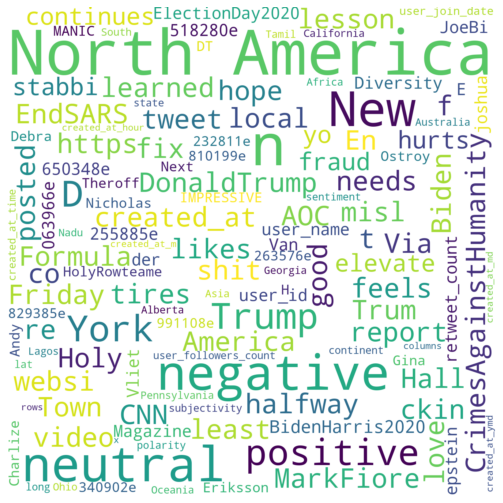

In [231]:
#Looking at all Tweets
plt.subplots(1,1, figsize=(9,9))
wc_b = WordCloud(stopwords=STOPWORDS, 
                 background_color="white", max_words=2000,
                 max_font_size=256, random_state=42,
                 width=1600, height=1600)
wc_b.generate(str(test_trump.dropna()))
plt.imshow(wc_b, interpolation="bilinear")
plt.axis('off')
plt.show()

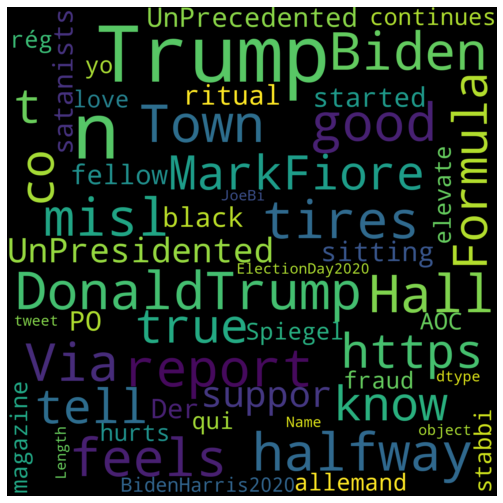

In [134]:
#Looking at just the United States 
text1 = test_trump.loc[test_trump['country'] == 'United States of America']['tweet']
plt.subplots(1,1, figsize=(9,9))
wc_t = WordCloud(stopwords=STOPWORDS, 
                 background_color="black", max_words=2000,
                 max_font_size=256, random_state=42,
                 width=1600, height=1600)
wc_t.generate(str(text1.dropna()))
plt.imshow(wc_t, interpolation="bilinear")
plt.axis('off')
plt.show()

### Biden

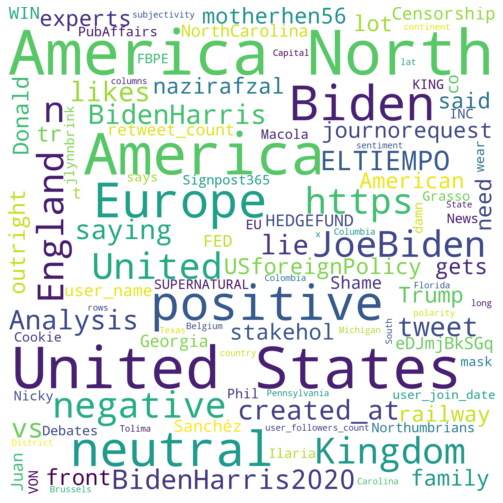

In [23]:
#Looking at all Tweets
plt.subplots(1,1, figsize=(9,9))
wc_b = WordCloud(stopwords=STOPWORDS, 
                 background_color="white", max_words=2000,
                 max_font_size=256, random_state=42,
                 width=1600, height=1600)
wc_b.generate(str(test_biden.dropna()))
plt.imshow(wc_b, interpolation="bilinear")
plt.axis('off')
plt.show()

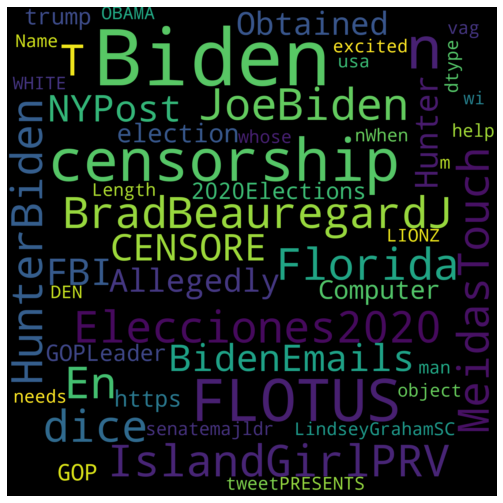

In [36]:
#Looking at just the United States 
text2 = df_biden.loc[df_biden['country'] == 'United States of America']['tweet']
plt.subplots(1,1, figsize=(9,9))
wc_t = WordCloud(stopwords=STOPWORDS, 
                 background_color="black", max_words=2000,
                 max_font_size=256, random_state=42,
                 width=1600, height=1600)
wc_t.generate(str(text2.dropna()))
plt.imshow(wc_t, interpolation="bilinear")
plt.axis('off')
plt.show()

## Mean Sentiment Score in US states over 14 days 

In [289]:
# Create 52 state set
states = set(test_trump.loc[test_trump['country'] == 'United States of America']['state'].dropna())
states.remove('District of Columbia')
#states.remove('Northern Mariana Islands')

# Create feature to allow masking of data and then mask data for votable states
test_biden['voting_rights'] = test_biden['state'].apply(lambda x: 'Yes' if x in states else 'No')
test_trump['voting_rights'] = test_trump['state'].apply(lambda x: 'Yes' if x in states else 'No')
sent_t = test_trump.loc[test_trump['voting_rights'] == 'Yes']
sent_b = test_biden.loc[test_biden['voting_rights'] == 'Yes']

# Only grab data from the last 14 days 
sent_t['created_at_time'] = pd.to_datetime(sent_t['created_at'], utc=True)
sent_b['created_at_time'] = pd.to_datetime(sent_b['created_at'], utc=True)
state_t = sent_t.loc[sent_t['created_at_time'] > max(sent_t['created_at_time']) - timedelta(14)]
state_b = sent_b.loc[sent_b['created_at_time'] > max(sent_b['created_at_time']) - timedelta(14)]

state_b_mean = state_b.groupby('state')['subjectivity'].mean().reset_index()
state_t_mean = state_t.groupby('state')['subjectivity'].mean().reset_index()

/var/folders/_y/2k4z31x5327g8s42stznn9wm0000gn/T/ipykernel_48199/1435961259.py:13: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/_y/2k4z31x5327g8s42stznn9wm0000gn/T/ipykernel_48199/1435961259.py:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [290]:
# Further mask data for only the last 14 days 
state_bp = sent_b.loc[sent_b['created_at_time'] < min(sent_b['created_at_time']) + timedelta(14)]
state_tp = sent_t.loc[sent_t['created_at_time'] < min(sent_t['created_at_time']) + timedelta(14)]
state_bp_mean = state_bp.groupby('state')['subjectivity'].mean().reset_index()
state_tp_mean = state_tp.groupby('state')['subjectivity'].mean().reset_index()

In [291]:
states_sent = pd.DataFrame({'state':state_b_mean['state'],
                          'biden1':state_b_mean['subjectivity'],
                          'trump1':state_t_mean['subjectivity'],
                          'biden2':state_bp_mean['subjectivity'],
                          'trump2':state_tp_mean['subjectivity'],})

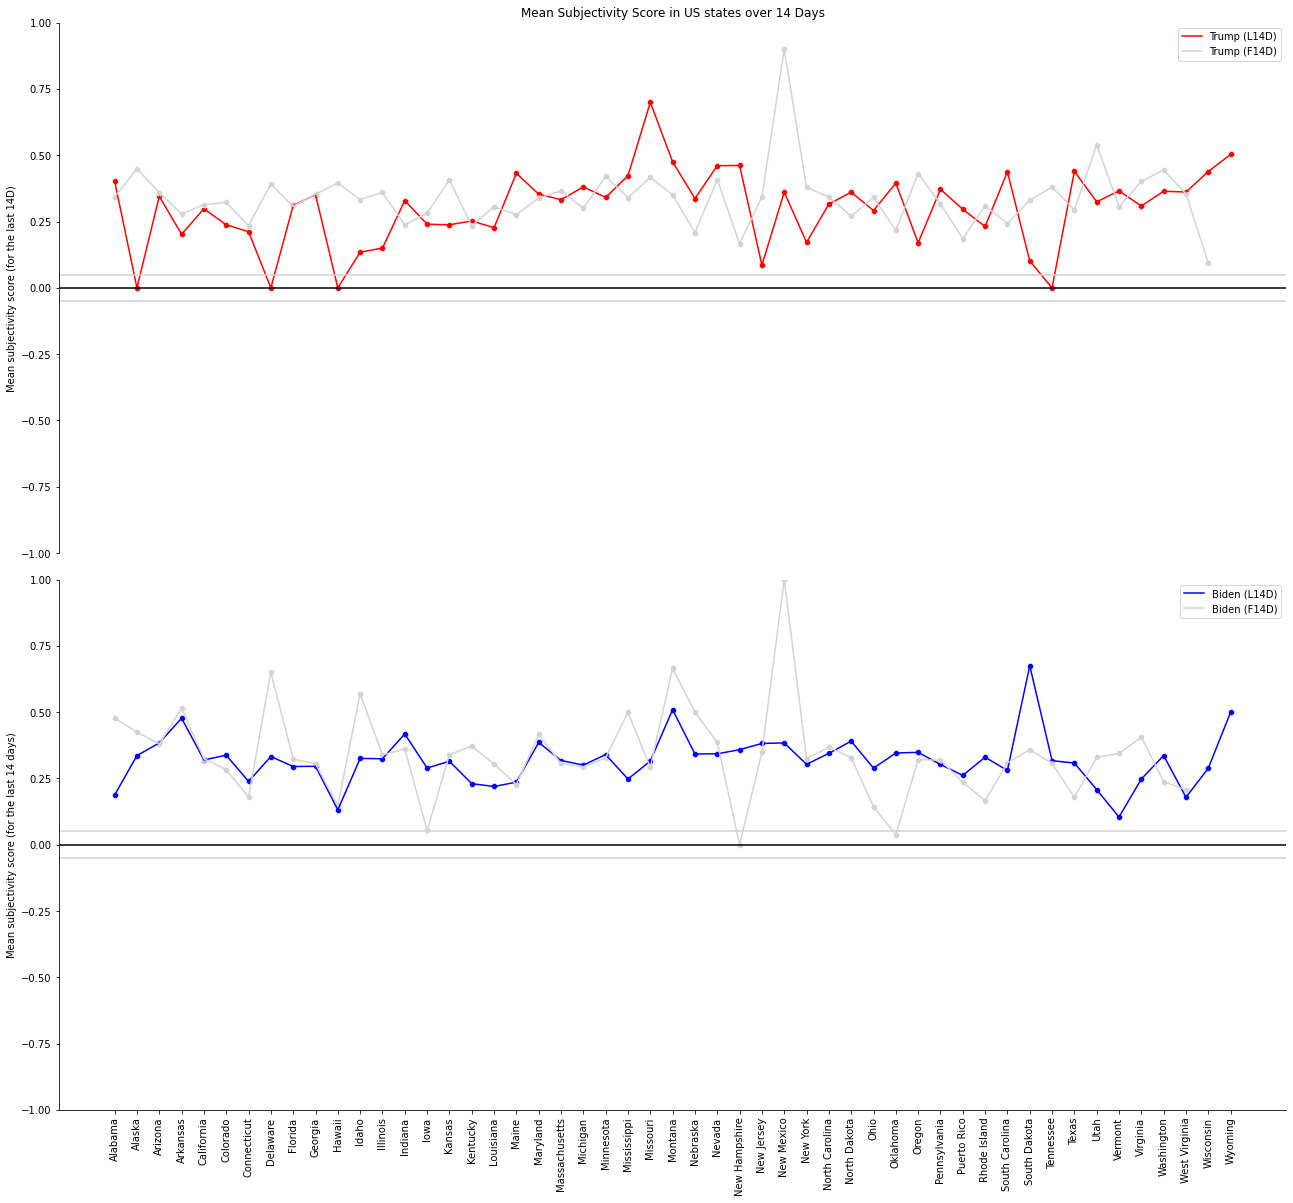

In [295]:
fig, ax = plt.subplots(2,1, figsize = (22,20), gridspec_kw = {'hspace':0.05})

lineax = ax[0]
sns.lineplot(x='state', y='trump1', color='red', data=states_sent, ax=lineax, label='Trump (L14D)').set_title('Mean Subjectivity Score in US states over 14 Days')
sns.scatterplot(x='state', y='trump1', color='red', data=states_sent, ax=lineax)
sns.lineplot(x='state', y='trump2', color='lightgrey', data=states_sent, ax=lineax, label='Trump (F14D)')
sns.scatterplot(x='state', y='trump2', color='lightgrey', data=states_sent, ax=lineax)
lineax.set_ylim([-1, 1])
lineax.set_ylabel('Mean subjectivity score (for the last 14D)')
lineax.set_xlabel('')
plt.xticks(rotation=90)
lineax.axhline(y=0, color='k', linestyle='-')
lineax.axhline(y=0.05, color='lightgrey', linestyle='-')
lineax.axhline(y=-0.05, color='lightgrey', linestyle='-')
lineax.axes.get_xaxis().set_ticks([])
lineax.spines['right'].set_visible(False)
lineax.spines['top'].set_visible(False)
lineax.spines['bottom'].set_visible(False)

lineax=ax[1]
sns.lineplot(x='state', y='biden1', color='blue', data = states_sent, ax = lineax, label ='Biden (L14D)')
sns.scatterplot(x='state', y='biden1', color='blue', data=states_sent, ax=lineax)
sns.lineplot(x='state', y = 'biden2', color = 'lightgrey', data = states_sent, ax = lineax, label = 'Biden (F14D)')
sns.scatterplot(x='state', y='biden2', color='lightgrey', data=states_sent, ax=lineax)
lineax.set_ylim([-1, 1])
lineax.set_ylabel('Mean subjectivity score (for the last 14 days)')
lineax.set_xlabel('')
plt.xticks(rotation=90)
lineax.axhline(y = 0, color ='k', linestyle = '-')
lineax.axhline(y = 0.05, color ='lightgrey', linestyle = '-')
lineax.axhline(y = -0.05, color='lightgrey', linestyle = '-')
lineax.spines['right'].set_visible(False)
lineax.spines['top'].set_visible(False)
plt.show()

## Average Polarity over Time

In [24]:
#For datetime graph purposes
test_trump['created_at_time'] = pd.to_datetime(test_trump['created_at'], utc=True)
test_trump['created_at_md'] = test_trump['created_at_time'].dt.strftime('%m-%d')

test_biden['created_at_time'] = pd.to_datetime(test_biden['created_at'], utc=True)
test_biden['created_at_md'] = test_biden['created_at_time'].dt.strftime('%m-%d')

#test_trump.groupby(['created_at_hour', 'sentiment'], as_index=False)
trump_groupby_date_mean = test_trump.groupby(['created_at_md', 'polarity'], as_index=False).mean()
biden_groupby_date_mean = test_biden.groupby(['created_at_md', 'polarity'], as_index=False).mean()
#biden_groupby_date_mean = test_biden.groupby('created_at')['polarity'].mean()

#Create new dataframe datewise_polarity
datewise_polarity = pd.DataFrame(columns=["Date", "Trump Polarity", "Biden Polarity"])
dates = trump_groupby_date_mean.created_at_md

datewise_polarity["Date"] = dates
datewise_polarity["Trump Polarity"] = trump_groupby_date_mean.polarity
datewise_polarity["Biden Polarity"] = biden_groupby_date_mean.polarity

datewise_polarity.set_index("Date", inplace=True)

<AxesSubplot:title={'center':'Average Polarity over Time'}, xlabel='Date', ylabel='Average Polarity'>

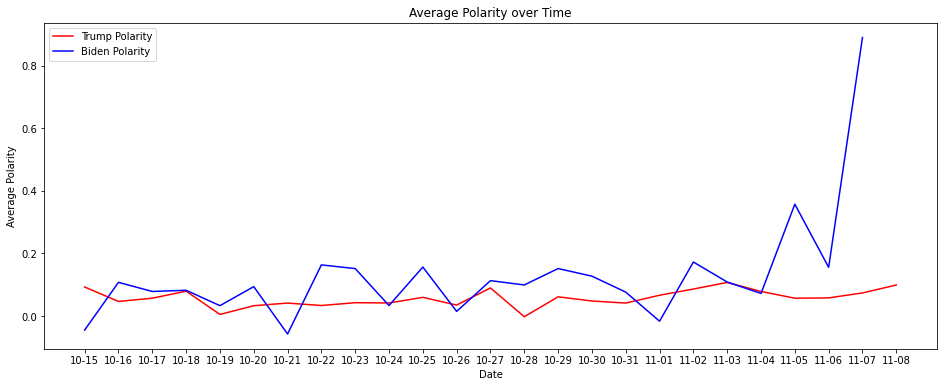

In [25]:
plt.figure(figsize=(16,6))

plt.title("Average Polarity over Time")
plt.xlabel("Date")
plt.ylabel("Average Polarity")

sns.lineplot(data=datewise_polarity, ci=None, palette=['r', 'b'], dashes=False)

## Tweet Counts Over Time 

In [27]:
#Trend tweets per day
#Setting datetime values

test_trump['created_at_time'] = pd.to_datetime(test_trump['created_at'], utc=True)
test_trump['created_at_ymd'] = test_trump['created_at_time'].dt.strftime('%Y-%m-%d')

test_biden['created_at_time'] = pd.to_datetime(test_biden['created_at'], utc=True)
test_biden['created_at_ymd'] = test_biden['created_at_time'].dt.strftime('%Y-%m-%d')


#Setting x values 
trump_y = test_trump.groupby(['created_at_ymd', 'sentiment'], as_index=False).count().sort_index()
biden_y = test_biden.groupby(['created_at_ymd', 'sentiment'], as_index=False).count().sort_index()

datewise_tweets = pd.DataFrame(columns=["Date", "Trump Tweets", "Biden Tweets"])
dates = trump_y.created_at_ymd

In [28]:
datewise_tweets["Date"] = dates
datewise_tweets["Trump Tweets"] = trump_y.created_at
datewise_tweets["Biden Tweets"] = biden_y.created_at
datewise_tweets.set_index("Date",inplace=True)

In [29]:
import plotly.graph_objects as go
fig = go.Figure(data=[
    go.Bar(name='Trump', x=dates, y=datewise_tweets["Trump Tweets"]), 
    go.Bar(name='Biden', x=dates, y=datewise_tweets["Biden Tweets"])
])

fig.update_layout(title_text='Number of Daily Tweets')
fig.update_xaxes(title='Date')
fig.update_yaxes(title='Count of Tweets')

fig.show()

## Pie Chart of Demographic
### Trump

In [126]:
def make_dictionary(dataframe,column):
    dictt = {}
    for i in list(dataframe[column]):
        if i in dictt:
            dictt[i] = dictt.get(i) + 1
        else:
            dictt[i] = 1
    return dictt

In [127]:
country_trump = make_dictionary(test_trump,'country')
state_trump = make_dictionary(test_trump,'state')
continent_trump = make_dictionary(test_trump,'continent')
continent_trump

{'South America': 207,
 'North America': 2713,
 'Asia': 500,
 'Europe': 1324,
 'Africa': 101,
 nan: 36,
 'Oceania': 119}

In [128]:
labelsT = ['North America', 'Europe', 'Asia', 'Africa']
valuesT = ['51', '27','18', '2']

In [129]:
#Does not look cute... pie chart with matplotlib
#figT = plt.pie(valuesT, labels=labelsT, autopct='%1.1f%%', radius=2)
#plt.show()
figT = px.pie(names=labelsT, values=valuesT, title='Tweet Demographic by Continent')
figT.show()